# 🔬 Clasificación de Imágenes Retinales con Deep Learning
## Análisis de Tomografía de Coherencia Óptica (OCT)

---

### 📋 Descripción del Dataset

**Fuente:** [Kermany et al. (2018)](https://data.mendeley.com/datasets/rscbjbr9sj/3)  
**Citación:** Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), "Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images", Mendeley Data, V3, doi: 10.17632/rscbjbr9sj.3

La tomografía de coherencia óptica (OCT) retinal es una técnica de imagen utilizada para capturar secciones transversales de alta resolución de las retinas de pacientes en vivo. Aproximadamente **30 millones de escaneos OCT** se realizan cada año, y el análisis e interpretación de estas imágenes consume una cantidad significativa de tiempo.

### 📊 Contenido del Dataset

- **Total de imágenes:** 109,309 imágenes (formato JPEG)
- **Categorías:** 4 clases de condiciones retinales
  - **CNV** (Neovascularización Coroidea)
  - **DME** (Edema Macular Diabético)
  - **DRUSEN** (Drusas)
  - **NORMAL** (Retina Normal)
- **División del Dataset:**
  - **Train:** 70% de las imágenes (~76,500)
  - **Validation:** 20% de las imágenes (~21,800)
  - **Test:** 10% de las imágenes (~10,900)
- **Etiquetado:** `(enfermedad)-(ID paciente)-(número de imagen)`

**Nota sobre la versión:** Esta versión del dataset (V2) reorganiza todas las 109,309 imágenes del dataset original en una división balanceada 70/20/10 para train/validation/test, proporcionando un split más equilibrado que la versión original.

### 🏥 Origen de las Imágenes

Las imágenes OCT (Spectralis OCT, Heidelberg Engineering, Alemania) fueron seleccionadas de cohortes retrospectivas de pacientes adultos de instituciones médicas prestigiosas:
- Shiley Eye Institute, UC San Diego
- California Retinal Research Foundation
- Medical Center Ophthalmology Associates
- Shanghai First People's Hospital
- Beijing Tongren Eye Center

**Período de recolección:** Julio 2013 - Marzo 2017

### ✅ Control de Calidad

Cada imagen pasó por un **sistema de clasificación de tres niveles** con capas múltiples de evaluadores entrenados:
1. **Primer nivel:** Estudiantes universitarios y de medicina con curso de interpretación OCT
2. **Segundo nivel:** Cuatro oftalmólogos que clasificaron independientemente cada imagen
3. **Tercer nivel:** Dos especialistas senior en retina con más de 20 años de experiencia

---

## 1. 📥 Adquisición de Datos

Descarga del dataset desde Kaggle utilizando la API de kagglehub. Este dataset contiene 109,309 imágenes OCT organizadas en una división balanceada (70/20/10) para entrenamiento, validación y prueba.

In [1]:
import kagglehub

# Descargar la versión mejorada del dataset (split 70/20/10)
path = kagglehub.dataset_download("anirudhcv/labeled-optical-coherence-tomography-oct")

print("✅ Ruta al dataset:", path)

✅ Ruta al dataset: /home/palodo2/.cache/kagglehub/datasets/anirudhcv/labeled-optical-coherence-tomography-oct/versions/2


---

## 2. 📊 Análisis Exploratorio de Datos (EDA)

En esta sección exploraremos la estructura del dataset, la distribución de las imágenes entre categorías y conjuntos, y analizaremos las características visuales de las imágenes OCT.

In [2]:
# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


### 2.1. 📁 Estructura del Dataset

Identificamos la ubicación de los datos y verificamos la estructura de carpetas (train/test/val).

In [3]:
# Buscar la estructura correcta del dataset (train/test/val)
data_path = None
for root, dirs, files in os.walk(path):
    if 'train' in dirs and 'test' in dirs and 'val' in dirs:
        data_path = root
        break

if data_path is None:
    print("❌ No se encontró la estructura train/test/val")
else:
    print(f"✅ Datos encontrados en: {data_path}")
    print(f"\n📂 Carpetas disponibles: {os.listdir(data_path)}")

✅ Datos encontrados en: /home/palodo2/.cache/kagglehub/datasets/anirudhcv/labeled-optical-coherence-tomography-oct/versions/2/Dataset - train+val+test

📂 Carpetas disponibles: ['train', 'val', 'test']


### 2.2. 📈 Distribución de Imágenes por Categoría

Analizamos cuántas imágenes tenemos de cada categoría en cada conjunto de datos.

In [4]:
# Contar imágenes por categoría y conjunto
categorias = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
conjuntos = ['train', 'test', 'val']

print("📊 Contando imágenes...\n")

# Crear un DataFrame para almacenar los conteos
data = []
for conjunto in conjuntos:
    for categoria in categorias:
        ruta_categoria = os.path.join(data_path, conjunto, categoria)
        if os.path.exists(ruta_categoria):
            num_imagenes = len([f for f in os.listdir(ruta_categoria) 
                              if f.endswith(('.jpeg', '.jpg', '.png'))])
            data.append({
                'Conjunto': conjunto, 
                'Categoría': categoria, 
                'Número de Imágenes': num_imagenes
            })

df_distribucion = pd.DataFrame(data)

print("=" * 60)
print("DISTRIBUCIÓN POR CONJUNTO Y CATEGORÍA")
print("=" * 60)
print(df_distribucion.pivot(index='Categoría', columns='Conjunto', 
                            values='Número de Imágenes'))

print("\n" + "=" * 60)
print("TOTAL POR CATEGORÍA")
print("=" * 60)
print(df_distribucion.groupby('Categoría')['Número de Imágenes'].sum()
      .sort_values(ascending=False))

print("\n" + "=" * 60)
print(f"✅ TOTAL GENERAL: {df_distribucion['Número de Imágenes'].sum():,} imágenes")
print("=" * 60)

📊 Contando imágenes...

DISTRIBUCIÓN POR CONJUNTO Y CATEGORÍA
Conjunto   test  train    val
Categoría                    
CNV        3746  26218   7491
DME        1161   8118   2319
DRUSEN      887   6206   1773
NORMAL     5139  35973  10278

TOTAL POR CATEGORÍA
Categoría
NORMAL    51390
CNV       37455
DME       11598
DRUSEN     8866
Name: Número de Imágenes, dtype: int64

✅ TOTAL GENERAL: 109,309 imágenes


### 2.3. 📊 Visualización de la Distribución

Gráficos para entender mejor el balance de clases y la distribución entre conjuntos.

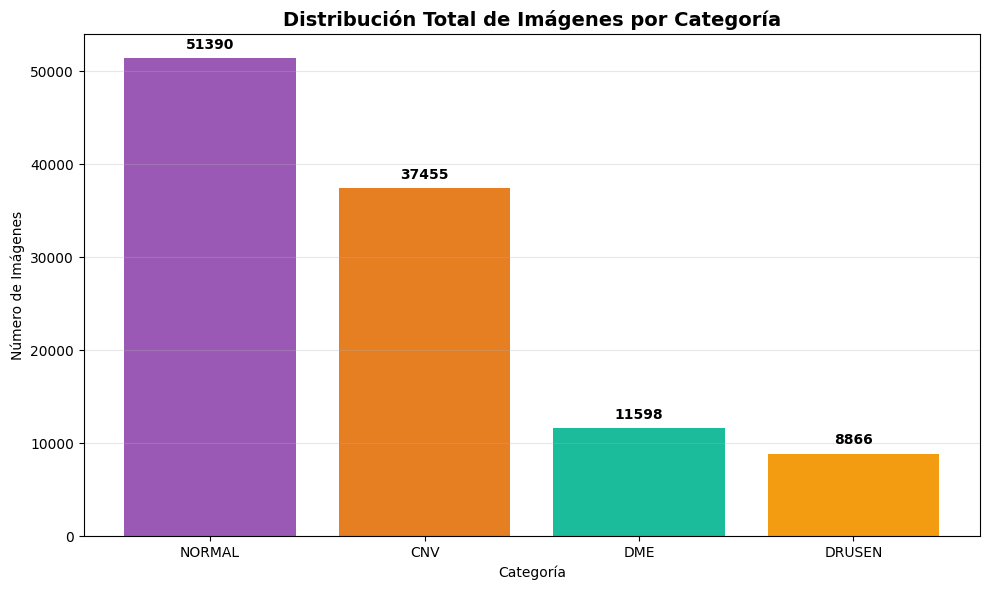

In [5]:
# Visualizar la distribución de imágenes por categoría
df_categoria = df_distribucion.groupby('Categoría')['Número de Imágenes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_categoria.index, df_categoria.values, color=['#9b59b6', '#e67e22', '#1abc9c', '#f39c12'])
plt.title('Distribución Total de Imágenes por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Número de Imágenes')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df_categoria.values):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

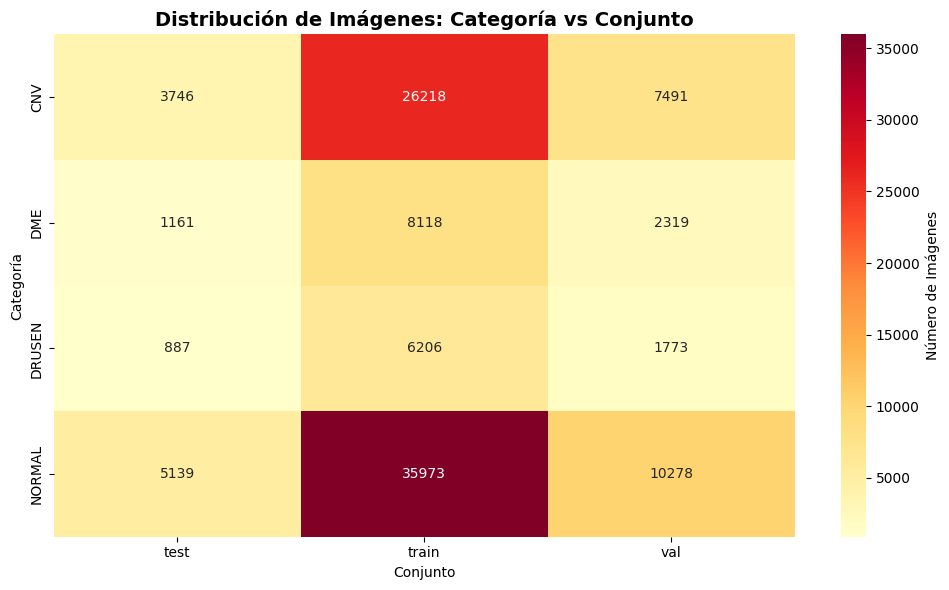

In [6]:
# Heatmap de distribución por conjunto y categoría
pivot_table = df_distribucion.pivot(index='Categoría', columns='Conjunto', values='Número de Imágenes')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Número de Imágenes'})
plt.title('Distribución de Imágenes: Categoría vs Conjunto', fontsize=14, fontweight='bold')
plt.xlabel('Conjunto')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

### 2.4. 🔍 Análisis de Características de las Imágenes

Examinamos las dimensiones, modos de color y propiedades técnicas de las imágenes.

In [7]:
# Analizar dimensiones y características de una muestra de imágenes
dimensiones = []
for categoria in categorias:
    ruta_categoria = os.path.join(data_path, 'train', categoria)
    if os.path.exists(ruta_categoria):
        imagenes = [f for f in os.listdir(ruta_categoria) if f.endswith(('.jpeg', '.jpg', '.png'))][:10]  # Tomar 10 muestras
        for img_name in imagenes:
            img_path = os.path.join(ruta_categoria, img_name)
            try:
                img = Image.open(img_path)
                dimensiones.append({
                    'Categoría': categoria,
                    'Ancho': img.size[0],
                    'Alto': img.size[1],
                    'Modo': img.mode
                })
            except:
                pass

df_dimensiones = pd.DataFrame(dimensiones)
print("Estadísticas de dimensiones de imágenes:")
print(df_dimensiones.groupby('Categoría')[['Ancho', 'Alto']].describe())

print("\nModos de color encontrados:")
print(df_dimensiones['Modo'].value_counts())

Estadísticas de dimensiones de imágenes:
          Ancho                                                         Alto  \
          count   mean         std    min    25%    50%    75%     max count   
Categoría                                                                      
CNV        10.0  819.2  396.593495  512.0  512.0  768.0  768.0  1536.0  10.0   
DME        10.0  563.2  107.939077  512.0  512.0  512.0  512.0   768.0  10.0   
DRUSEN     10.0  819.2  396.593495  512.0  512.0  768.0  768.0  1536.0  10.0   
NORMAL     10.0  716.8  314.693784  512.0  512.0  640.0  768.0  1536.0  10.0   

                                                               
            mean       std    min    25%    50%    75%    max  
Categoría                                                      
CNV        496.0  0.000000  496.0  496.0  496.0  496.0  496.0  
DME        505.6  8.262364  496.0  496.0  512.0  512.0  512.0  
DRUSEN     496.0  0.000000  496.0  496.0  496.0  496.0  496.0  
NORMAL     496

### 2.5. 🖼️ Visualización de Muestras de Imágenes

Mostramos ejemplos reales de cada categoría para entender visualmente las diferencias.

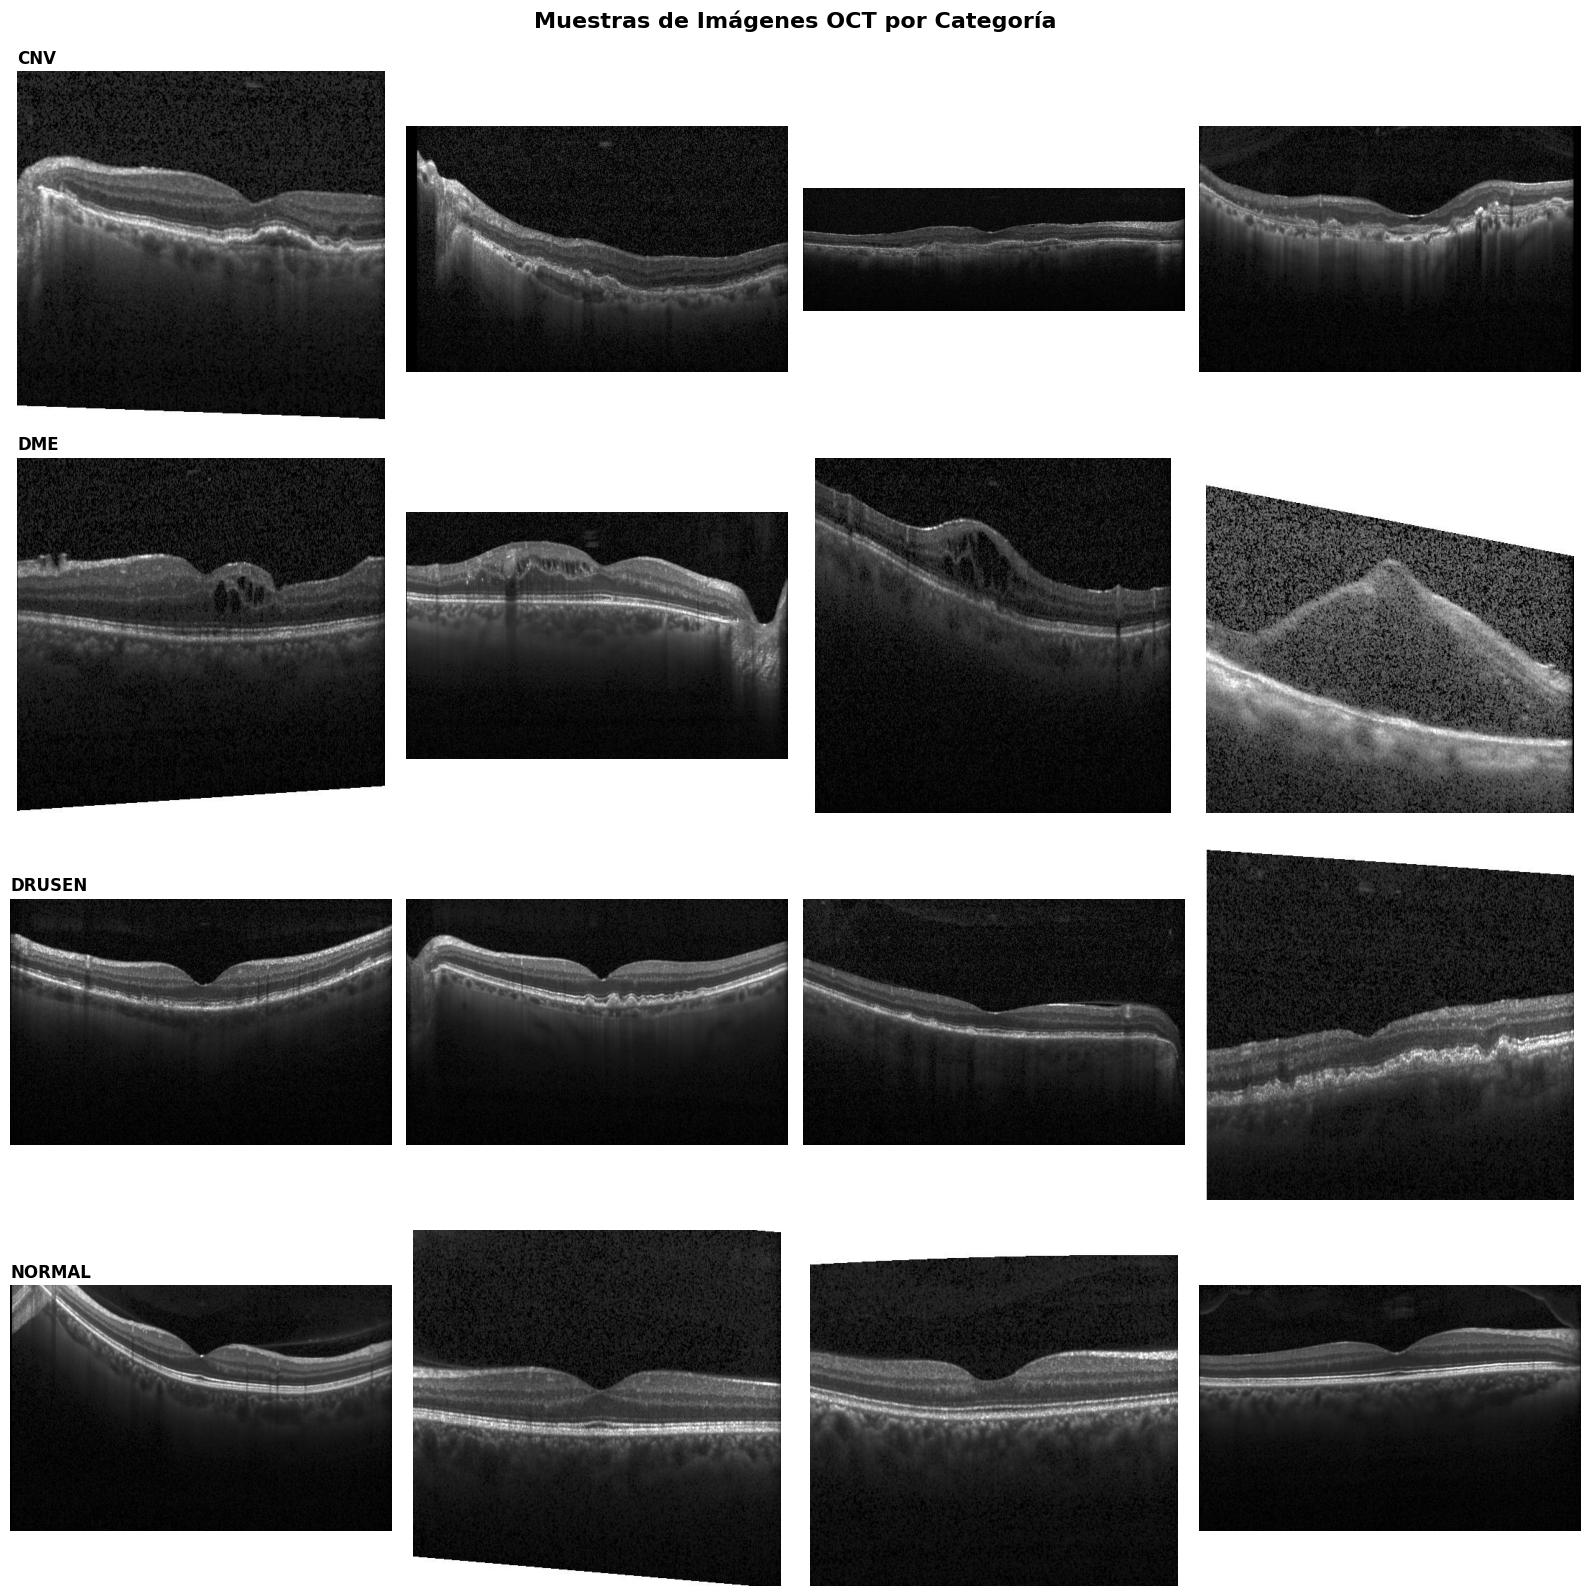

In [8]:
# Visualizar ejemplos de cada categoría
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Muestras de Imágenes OCT por Categoría', fontsize=16, fontweight='bold', y=0.995)

for i, categoria in enumerate(categorias):
    ruta_categoria = os.path.join(data_path, 'train', categoria)
    if os.path.exists(ruta_categoria):
        imagenes = [f for f in os.listdir(ruta_categoria) if f.endswith(('.jpeg', '.jpg', '.png'))][:4]
        
        for j, img_name in enumerate(imagenes):
            img_path = os.path.join(ruta_categoria, img_name)
            try:
                img = Image.open(img_path)
                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(f'{categoria}', fontsize=12, fontweight='bold', loc='left')
            except:
                axes[i, j].axis('off')

plt.tight_layout()
plt.show()


---

## 3. 🔧 Preparación de Datos para Modelado

Implementamos **Data Loaders** para cargar las imágenes eficientemente sin saturar la memoria. Los data loaders cargan las imágenes en lotes (batches) directamente desde el disco.

**Ventajas:**
- ✅ No carga todas las imágenes en memoria
- ✅ Procesamiento eficiente por lotes
- ✅ Compatible directo con modelos de Keras/TensorFlow
- ✅ Optimización automática de lectura

### 3.1. 🔧 Definición del DataLoader

Definimos la función `create_oct_dataloaders` que permite configurar fácilmente el batch size, tamaño de imagen y subset de datos. Esta función incluye optimizaciones automáticas (cache + prefetch).

### 3.2. ⚙️ Configuración y Creación de Data Loaders

Creamos los data loaders para train, val y test con los parámetros configurados.

In [9]:
# ============================================================================
# DEFINICIÓN DEL DATALOADER (para usar en Colab)
# ============================================================================
# Este código define la función create_oct_dataloaders para que pueda
# usarse directamente en Colab sin necesidad de archivos externos

import tensorflow as tf
from typing import Tuple, Optional

def create_oct_dataloaders(
    data_path: str,
    img_size: Tuple[int, int] = (224, 224),
    batch_size: int = 32,
    train_subset_fraction: float = 1.0,
    seed: int = 42,
    validation_split: Optional[float] = None,
    optimize: bool = True,
    verbose: bool = True
):
    """
    Crea dataloaders para el dataset OCT con configuración flexible.
    
    Parámetros:
    - data_path: Ruta al directorio con carpetas 'train', 'val' y 'test'
    - img_size: Tamaño de las imágenes (ancho, alto). Default: (224, 224)
    - batch_size: Número de imágenes por lote. Default: 32
    - train_subset_fraction: Fracción del dataset de train a usar (0.0-1.0). Default: 1.0
    - seed: Semilla para reproducibilidad. Default: 42
    - optimize: Aplicar cache + prefetch. Default: True
    - verbose: Mostrar información. Default: True
    
    Retorna: (train_dataset, val_dataset, test_dataset, class_names)
    """
    
    class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
    
    if verbose:
        print("⚙️ Configuración de DataLoaders")
        print(f"   • Tamaño de imagen: {img_size}")
        print(f"   • Batch size: {batch_size}")
        print(f"   • Clases: {class_names}")
        print(f"   • Train subset: {train_subset_fraction*100:.1f}%")
        print(f"   • Optimización: {'Activada' if optimize else 'Desactivada'}\n")
    
    # DATA LOADER DE ENTRENAMIENTO
    train_path = os.path.join(data_path, 'train')
    if not os.path.exists(train_path):
        raise ValueError(f"No se encontró carpeta de entrenamiento en: {train_path}")
    
    if verbose:
        print("📦 Creando data loader de entrenamiento...")
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_path,
        labels='inferred',
        label_mode='int',
        class_names=class_names,
        color_mode='rgb',
        batch_size=batch_size,
        image_size=img_size,
        shuffle=True,
        seed=seed
    )
    
    # Aplicar subset si se especificó
    if train_subset_fraction < 1.0:
        total_batches = tf.data.experimental.cardinality(train_dataset).numpy()
        subset_batches = max(1, int(total_batches * train_subset_fraction))
        train_dataset = train_dataset.take(subset_batches)
        if verbose:
            print(f"   ⚠️  Usando {train_subset_fraction*100:.1f}% del dataset")
            print(f"   ⚠️  Batches: {subset_batches} de {total_batches}")
    
    # Aplicar optimización
    if optimize:
        train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
        if verbose:
            print(f"✅ Data loader de entrenamiento creado (con optimización)")
    else:
        if verbose:
            print(f"✅ Data loader de entrenamiento creado")
    
    # DATA LOADER DE VALIDACIÓN
    val_path = os.path.join(data_path, 'val')
    val_dataset = None
    
    if os.path.exists(val_path):
        if verbose:
            print("\n📦 Creando data loader de validación...")
        
        val_dataset = tf.keras.utils.image_dataset_from_directory(
            val_path,
            labels='inferred',
            label_mode='int',
            class_names=class_names,
            color_mode='rgb',
            batch_size=batch_size,
            image_size=img_size,
            shuffle=False
        )
        
        if optimize:
            val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
            if verbose:
                print(f"✅ Data loader de validación creado (con optimización)")
        else:
            if verbose:
                print(f"✅ Data loader de validación creado")
    else:
        if verbose:
            print("\n⚠️  No se encontró data loader de validación")
    
    # DATA LOADER DE PRUEBA
    test_path = os.path.join(data_path, 'test')
    test_dataset = None
    
    if os.path.exists(test_path):
        if verbose:
            print("\n📦 Creando data loader de prueba...")
        
        test_dataset = tf.keras.utils.image_dataset_from_directory(
            test_path,
            labels='inferred',
            label_mode='int',
            class_names=class_names,
            color_mode='grayscale',
            batch_size=batch_size,
            image_size=img_size,
            shuffle=False
        )
        
        if optimize:
            test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
            if verbose:
                print(f"✅ Data loader de prueba creado (con optimización)")
        else:
            if verbose:
                print(f"✅ Data loader de prueba creado")
    else:
        if verbose:
            print("\n⚠️  No se encontró data loader de prueba")
    
    # RESUMEN
    if verbose:
        print("\n" + "="*60)
        print("📊 RESUMEN DE DATASETS")
        print("="*60)
        
        if train_dataset:
            train_cardinality = tf.data.experimental.cardinality(train_dataset).numpy()
            print(f"Train:      {train_cardinality} batches")
        
        if val_dataset:
            val_cardinality = tf.data.experimental.cardinality(val_dataset).numpy()
            print(f"Validation: {val_cardinality} batches")
        
        if test_dataset:
            test_cardinality = tf.data.experimental.cardinality(test_dataset).numpy()
            print(f"Test:       {test_cardinality} batches")
        
        print("="*60 + "\n")
    
    return train_dataset, val_dataset, test_dataset, class_names


def get_label_map():
    """Retorna el mapeo de nombres de clase a índices numéricos."""
    return {
        'CNV': 0,      # Neovascularización Coroidea
        'DME': 1,      # Edema Macular Diabético
        'DRUSEN': 2,   # Drusas
        'NORMAL': 3    # Retina Normal
    }

print("✅ Funciones de dataloader definidas correctamente")

2026-02-27 19:11:34.705858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-27 19:11:34.734105: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-27 19:11:35.553686: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


✅ Funciones de dataloader definidas correctamente


In [10]:

#from oct_dataloader import create_oct_dataloaders, get_label_map

# ============================================================================
# CONFIGURACIÓN DE PARÁMETROS
# ============================================================================
IMG_SIZE = (224, 224)  # Tamaño al que se redimensionarán las imágenes
BATCH_SIZE = 32         # Número de imágenes por lote
TRAIN_SUBSET = 1.0      # Usar 100% de los datos (cambiar a 0.5 para usar solo 50%)

# ============================================================================
# CREAR DATA LOADERS
# ============================================================================
train_dataset, val_dataset, test_dataset, class_names = create_oct_dataloaders(
    data_path=data_path,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    train_subset_fraction=TRAIN_SUBSET,
    seed=42,
    verbose=True
)

# Obtener mapeo de etiquetas
label_map = get_label_map()
print(f"\n🏷️  Mapeo de etiquetas: {label_map}")

# Verificar la forma de un batch (usando iter/next para evitar warnings)
print("\n📐 Verificando forma de batches:")
images, labels = next(iter(train_dataset))
print(f"   • Train - Images shape: {images.shape}")
print(f"   • Train - Labels shape: {labels.shape}")
print(f"   • Rango de valores: [{tf.reduce_min(images).numpy():.0f}, {tf.reduce_max(images).numpy():.0f}]")

if val_dataset:
    images, labels = next(iter(val_dataset))
    print(f"   • Val - Images shape: {images.shape}")
        
if test_dataset:
    images, labels = next(iter(test_dataset))
    print(f"   • Test - Images shape: {images.shape}")


⚙️ Configuración de DataLoaders
   • Tamaño de imagen: (224, 224)
   • Batch size: 32
   • Clases: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
   • Train subset: 100.0%
   • Optimización: Activada

📦 Creando data loader de entrenamiento...
Found 76515 files belonging to 4 classes.


I0000 00:00:1772215897.364128 2475267 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 76802 MB memory:  -> device: 0, name: NVIDIA H100 PCIe, pci bus id: 0000:05:00.0, compute capability: 9.0
I0000 00:00:1772215897.366577 2475267 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 77921 MB memory:  -> device: 1, name: NVIDIA H100 PCIe, pci bus id: 0000:09:00.0, compute capability: 9.0
I0000 00:00:1772215897.368778 2475267 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 77921 MB memory:  -> device: 2, name: NVIDIA H100 PCIe, pci bus id: 0000:8d:00.0, compute capability: 9.0
I0000 00:00:1772215897.370968 2475267 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 77921 MB memory:  -> device: 3, name: NVIDIA H100 PCIe, pci bus id: 0000:91:00.0, compute capability: 9.0
E0000 00:00:1772215898.345624 2475717 ptx_compiler_helpers.cc:88] *** WARNING *** In

✅ Data loader de entrenamiento creado (con optimización)

📦 Creando data loader de validación...
Found 21861 files belonging to 4 classes.
✅ Data loader de validación creado (con optimización)

📦 Creando data loader de prueba...
Found 10933 files belonging to 4 classes.
✅ Data loader de prueba creado (con optimización)

📊 RESUMEN DE DATASETS
Train:      2392 batches
Validation: 684 batches
Test:       342 batches


🏷️  Mapeo de etiquetas: {'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

📐 Verificando forma de batches:
   • Train - Images shape: (32, 224, 224, 3)
   • Train - Labels shape: (32,)
   • Rango de valores: [0, 255]
   • Val - Images shape: (32, 224, 224, 3)
   • Test - Images shape: (32, 224, 224, 1)


2026-02-27 19:11:39.391601: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2026-02-27 19:11:39.480514: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2026-02-27 19:11:39.520073: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. I

### 3.3. 📋 Resumen de los Datos Cargados

Resumen completo de las imágenes disponibles en cada conjunto y número de batches.

In [11]:
# ============================================================================
# RESUMEN COMPLETO DE DATA LOADERS
# ============================================================================
print("=" * 70)
print(" " * 20 + "📊 RESUMEN DE DATA LOADERS")
print("=" * 70)

# Contar imágenes en cada conjunto
conjuntos = {
    '🎓 Entrenamiento (train)': 'train',
    '✅ Validación (val)': 'val',
    '🧪 Prueba (test)': 'test'
}

total_general = 0
for nombre, carpeta in conjuntos.items():
    total_conjunto = 0
    print(f"\n{nombre}:")
    print("-" * 70)
    
    for categoria in ['CNV', 'DME', 'DRUSEN', 'NORMAL']:
        ruta_categoria = os.path.join(data_path, carpeta, categoria)
        if os.path.exists(ruta_categoria):
            num = len([f for f in os.listdir(ruta_categoria) 
                      if f.endswith(('.jpeg', '.jpg', '.png'))])
            total_conjunto += num
            print(f"   • {categoria:8s}: {num:>6,} imágenes")
    
    num_batches = total_conjunto // BATCH_SIZE + (1 if total_conjunto % BATCH_SIZE else 0)
    print(f"\n   TOTAL: {total_conjunto:,} imágenes ({num_batches} batches de {BATCH_SIZE})")
    total_general += total_conjunto

print("\n" + "=" * 70)
print(f"🎯 TOTAL GENERAL: {total_general:,} imágenes en el dataset")
print("=" * 70)
print(f"\n💡 Los datos se cargan en batches de {BATCH_SIZE} imágenes")
print("   (No se carga todo en memoria a la vez - uso eficiente de RAM)")

                    📊 RESUMEN DE DATA LOADERS

🎓 Entrenamiento (train):
----------------------------------------------------------------------
   • CNV     : 26,218 imágenes
   • DME     :  8,118 imágenes
   • DRUSEN  :  6,206 imágenes
   • NORMAL  : 35,973 imágenes

   TOTAL: 76,515 imágenes (2392 batches de 32)

✅ Validación (val):
----------------------------------------------------------------------
   • CNV     :  7,491 imágenes
   • DME     :  2,319 imágenes
   • DRUSEN  :  1,773 imágenes
   • NORMAL  : 10,278 imágenes

   TOTAL: 21,861 imágenes (684 batches de 32)

🧪 Prueba (test):
----------------------------------------------------------------------
   • CNV     :  3,746 imágenes
   • DME     :  1,161 imágenes
   • DRUSEN  :    887 imágenes
   • NORMAL  :  5,139 imágenes

   TOTAL: 10,933 imágenes (342 batches de 32)

🎯 TOTAL GENERAL: 109,309 imágenes en el dataset

💡 Los datos se cargan en batches de 32 imágenes
   (No se carga todo en memoria a la vez - uso eficiente de RAM)

### 3.4. 🎨 Visualización de Muestras del Data Loader

Verificamos que los data loaders funcionen correctamente visualizando muestras del conjunto de entrenamiento.

2026-02-27 19:11:39.650840: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


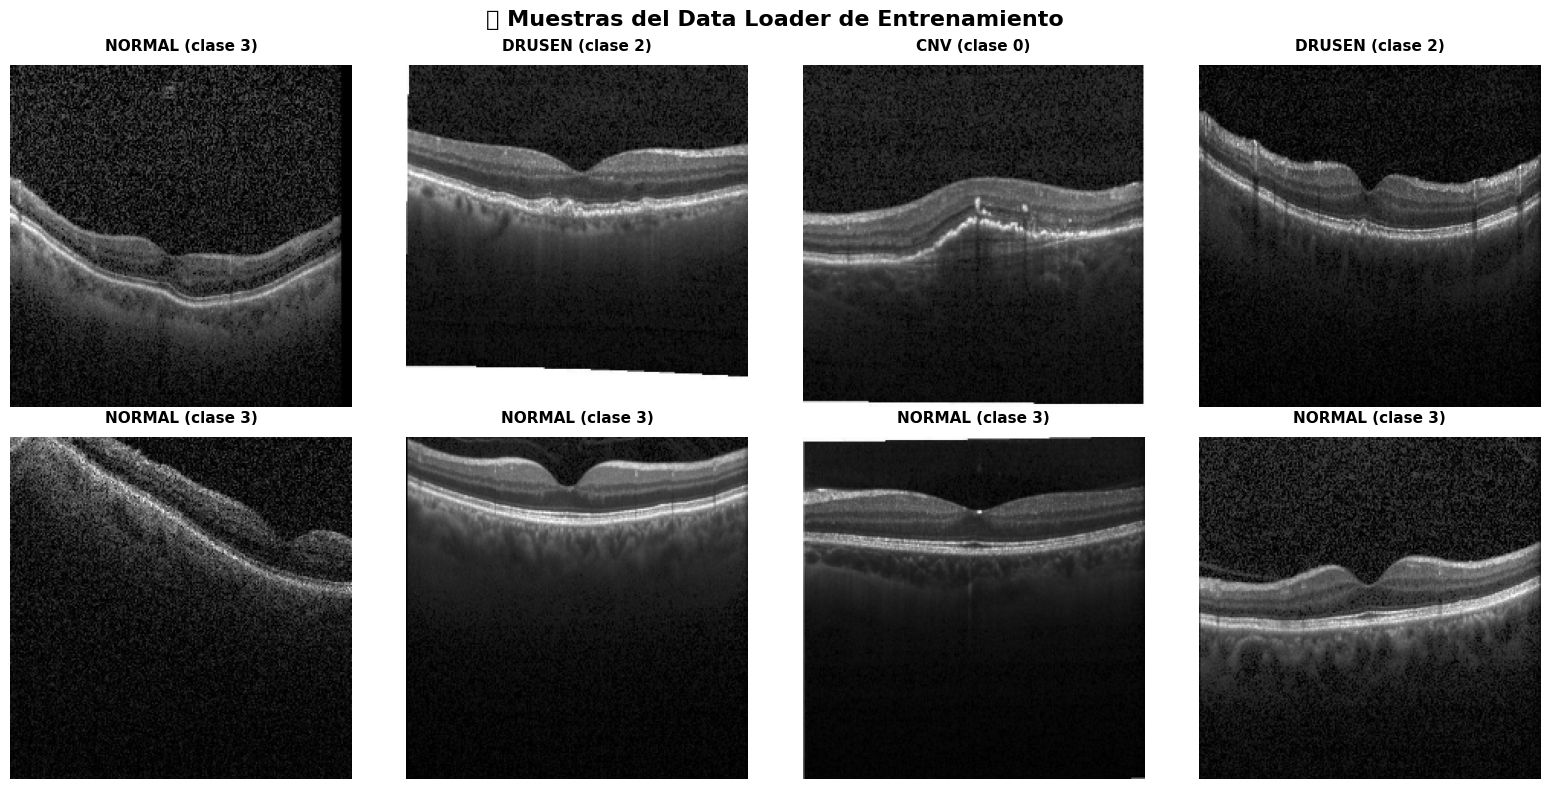


✅ Visualización completada
   • Mostrando 8 imágenes de un batch de 32
   • Tamaño de cada imagen: (224, 224)


In [12]:
# ============================================================================
# VISUALIZACIÓN DE MUESTRAS DEL DATA LOADER
# ============================================================================

# Crear figura para mostrar 8 muestras
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('🖼️ Muestras del Data Loader de Entrenamiento', 
             fontsize=16, fontweight='bold')

# Mapeo inverso para mostrar nombres de categorías
inv_label_map = {v: k for k, v in label_map.items()}

# Obtener un batch del data loader (usando iter/next para evitar warnings)
images_batch, labels_batch = next(iter(train_dataset))

# Mostrar 8 imágenes del batch
for idx in range(8):
    row = idx // 4
    col = idx % 4
    
    ax = axes[row, col]
    # Convertir imagen para visualización
    img = images_batch[idx].numpy().astype('uint8')
    ax.imshow(img)
    
    # Agregar título con la etiqueta
    label = labels_batch[idx].numpy()
    categoria = inv_label_map[label]
    ax.set_title(f'{categoria} (clase {label})', 
                 fontsize=11, fontweight='bold', pad=10)
    ax.axis('off')
    
    # Agregar un borde de color según la categoría
    colors = {0: '#9b59b6', 1: '#e67e22', 2: '#1abc9c', 3: '#f39c12'}
    for spine in ax.spines.values():
        spine.set_edgecolor(colors[label])
        spine.set_linewidth(3)

plt.tight_layout()
plt.show()

print("\n✅ Visualización completada")
print(f"   • Mostrando 8 imágenes de un batch de {BATCH_SIZE}")
print(f"   • Tamaño de cada imagen: {IMG_SIZE}")

---

## 5. 📊 Métricas de Evaluación para Clasificación Multiclase

En un problema de **clasificación multiclase** como este (4 clases: CNV, DME, DRUSEN, NORMAL), es fundamental utilizar métricas apropiadas que capturen el rendimiento del modelo en todas las clases.

### 🎯 Métricas Esenciales

#### 1. **Accuracy (Exactitud)**
$$\text{Accuracy} = \frac{\text{Predicciones Correctas}}{\text{Total de Predicciones}}$$

- **Cuándo usarla:** Cuando las clases están **balanceadas**
- **Limitación:** Puede ser engañosa en datasets desbalanceados
- **Nuestro caso:** Útil como métrica general, pero debe complementarse con otras

```python
# Implementación con Keras
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
```

---

#### 2. **Precision, Recall y F1-Score por Clase**

Para cada clase $i$:

**Precision (Precisión):**
$$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$$
- *¿De todas las predicciones de clase $i$, cuántas fueron correctas?*

**Recall (Sensibilidad/Exhaustividad):**
$$\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}$$
- *¿De todos los casos reales de clase $i$, cuántos detectamos?*

**F1-Score:**
$$F1_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$$
- *Media armónica entre Precision y Recall*

```python
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Obtener predicciones
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Reporte completo
print(classification_report(y_true, y_pred_classes, 
                          target_names=['CNV', 'DME', 'DRUSEN', 'NORMAL']))
```

---

#### 3. **Matriz de Confusión**

Visualización fundamental que muestra:
- **Diagonal principal:** Predicciones correctas
- **Filas:** Clase real
- **Columnas:** Clase predicha
- **Errores:** Fuera de la diagonal

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['CNV', 'DME', 'DRUSEN', 'NORMAL'],
            yticklabels=['CNV', 'DME', 'DRUSEN', 'NORMAL'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()
```

**¿Qué buscar?**
- ✅ Valores altos en la diagonal
- ⚠️ Confusiones específicas entre clases (ej: DME vs DRUSEN)

---

#### 4. **Macro y Micro Averaging**

##### **Macro Average**
Calcula la métrica para cada clase y luego promedia:
$$\text{Macro-F1} = \frac{1}{n}\sum_{i=1}^{n} F1_i$$

- **Ventaja:** Trata todas las clases por igual (útil con desbalance)
- **Uso:** Cuando todas las clases son igualmente importantes

##### **Micro Average**
Agrega todas las predicciones y calcula la métrica globalmente:
$$\text{Micro-F1} = \frac{\sum TP}{\sum TP + \sum FP}$$

- **Ventaja:** Favorece clases mayoritarias
- **Uso:** Cuando el volumen total de predicciones importa más

```python
# Calcular ambas
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_true, y_pred_classes, average='macro'
)

precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_true, y_pred_classes, average='micro'
)

print(f"Macro F1-Score: {f1_macro:.4f}")
print(f"Micro F1-Score: {f1_micro:.4f}")
```

---

#### 5. **Categorical Crossentropy Loss**

Pérdida estándar para clasificación multiclase:
$$\mathcal{L} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)$$

- Penaliza predicciones incorrectas proporcionalmente a su confianza
- Ideal para optimización durante el entrenamiento

```python
model.compile(
    loss='sparse_categorical_crossentropy',  # Si labels son enteros
    # loss='categorical_crossentropy',      # Si labels son one-hot encoded
    metrics=['accuracy']
)
```

---

#### 6. **AUC-ROC Multiclase**

Para multiclase, se usan estrategias:

##### **One-vs-Rest (OvR)**
- Entrena un clasificador binario por cada clase
- AUC promedio de todas las comparaciones

##### **One-vs-One (OvO)**
- Compara cada par de clases
- AUC promedio de todas las comparaciones

```python
from sklearn.metrics import roc_auc_score

# One-vs-Rest
auc_ovr = roc_auc_score(y_true, y_pred, multi_class='ovr', average='macro')
print(f"AUC-ROC (OvR Macro): {auc_ovr:.4f}")

# One-vs-One
auc_ovo = roc_auc_score(y_true, y_pred, multi_class='ovo', average='macro')
print(f"AUC-ROC (OvO Macro): {auc_ovo:.4f}")
```

---

#### 7. **Cohen's Kappa**

Mide el acuerdo entre predicciones y realidad, ajustando por el azar:
$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

- **Valores:**
  - $\kappa = 1$: Acuerdo perfecto
  - $\kappa = 0$: Acuerdo aleatorio
  - $\kappa < 0$: Peor que el azar

```python
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa: {kappa:.4f}")
```

**Interpretación:**
- < 0.20: Pobre
- 0.21-0.40: Aceptable
- 0.41-0.60: Moderado
- 0.61-0.80: Bueno
- 0.81-1.00: Excelente

---

#### 8. **Top-k Accuracy**

Útil cuando queremos saber si la clase correcta está entre las $k$ predicciones más probables:

```python
from tensorflow.keras.metrics import TopKCategoricalAccuracy

# Durante el entrenamiento
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 
             TopKCategoricalAccuracy(k=2, name='top_2_accuracy')]
)

# Evaluación manual
top_2_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=2)
top_2_acc.update_state(y_true_onehot, y_pred)
print(f"Top-2 Accuracy: {top_2_acc.result().numpy():.4f}")
```

---

### 🏥 Métricas Específicas para Diagnóstico Médico

En aplicaciones médicas como este proyecto de OCT, también son importantes:

#### **Sensibilidad (Sensitivity/Recall) por Enfermedad**
Crucial en medicina: **no queremos perder casos positivos**
- Alta sensibilidad para CNV, DME y DRUSEN es prioritaria

#### **Especificidad (Specificity)**
$$\text{Specificity} = \frac{TN}{TN + FP}$$
- Importante para evitar falsos positivos que generen alarmas innecesarias

#### **Valor Predictivo Positivo (PPV) y Negativo (NPV)**
- **PPV = Precision:** Si predecimos enfermedad, ¿qué tan confiable es?
- **NPV:** Si predecimos normal, ¿qué tan confiable es?

```python
from sklearn.metrics import confusion_matrix

def calculate_specificity_npv(y_true, y_pred, class_idx):
    """Calcula especificidad y NPV para una clase específica"""
    cm = confusion_matrix(y_true == class_idx, y_pred == class_idx)
    tn, fp, fn, tp = cm.ravel()
    
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    return specificity, npv

# Calcular para cada clase
for i, class_name in enumerate(['CNV', 'DME', 'DRUSEN', 'NORMAL']):
    spec, npv = calculate_specificity_npv(y_true, y_pred_classes, i)
    print(f"{class_name} - Specificity: {spec:.4f}, NPV: {npv:.4f}")
```

---

### 📈 Métricas Recomendadas para Este Proyecto

Para el problema de clasificación de imágenes OCT retinales:

#### **Durante el Entrenamiento:**
```python
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
```

#### **Evaluación Final Completa:**
```python
# 1. Métricas generales
print("="*60)
print("MÉTRICAS GENERALES")
print("="*60)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 2. Reporte por clase
print("\n" + "="*60)
print("MÉTRICAS POR CLASE")
print("="*60)
print(classification_report(y_true, y_pred_classes, 
                          target_names=['CNV', 'DME', 'DRUSEN', 'NORMAL']))

# 3. Matriz de confusión
print("\n" + "="*60)
print("MATRIZ DE CONFUSIÓN")
print("="*60)
# [Código de visualización de matriz de confusión]

# 4. AUC-ROC
auc = roc_auc_score(y_true, y_pred, multi_class='ovr', average='macro')
print(f"\nAUC-ROC (Macro OvR): {auc:.4f}")

# 5. Cohen's Kappa
kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa: {kappa:.4f}")
```

---

### ⚠️ Consideraciones Importantes

#### **Dataset Desbalanceado**
Si las clases están desbalanceadas:
- ✅ Usar **class weights** durante el entrenamiento
- ✅ Preferir **Macro F1-Score** sobre Accuracy
- ✅ Analizar **Recall por clase** (especialmente clases minoritarias)

```python
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos de clase
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Entrenar con pesos
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    class_weight=class_weight_dict
)
```

#### **Prioridad en Medicina**
En aplicaciones médicas:
1. **Recall alto** para enfermedades (no perder casos)
2. **Precision razonable** (evitar exceso de falsos positivos)
3. **F1-Score balanceado** para cada enfermedad

---

### 📚 Resumen de Métricas Clave

| Métrica | Propósito | Cuándo Usarla |
|---------|-----------|---------------|
| **Accuracy** | Rendimiento general | Clases balanceadas |
| **Macro F1-Score** | Rendimiento balanceado entre clases | Clases desbalanceadas |
| **Recall por Clase** | Detección de cada enfermedad | Crítico en medicina |
| **Matriz de Confusión** | Identificar confusiones específicas | Siempre |
| **AUC-ROC** | Capacidad de discriminación | Evaluación robusta |
| **Cohen's Kappa** | Acuerdo ajustado por azar | Validación adicional |

---